In [2]:
import pandas as pd
import numpy as np
from itertools import combinations


In [15]:
# data = pd.read_csv("sepet.csv",header= None,names =["ürünler"])
# data.shape

# MEDİUM

In [12]:
# if data not 2D shape this is funciton convert to 2-dimensional type
def to_2D(data):
    '''
    multi dimensional data conver to 2 dimensional data
    -----------
    parameters:
    -----------
    data:  multi dimensional dataframe
    
    return:
    -------
    sp:  2D dataframe
    
    exapmle:
    -------
    
    TID      ITEMS
    100      egg,burgers,chicken 
    200      glass,green tea,cake
    ------------------------
    '''
    data.fillna(0,inplace=True)
    sp = pd.DataFrame(np.zeros(len(data)*1).reshape(len(data),1),columns=["ürünler"])
    for i in range(len(sepet)):
        arr = data.loc[i].values
        new_arr = np.delete(arr, np.where(arr == 0))
        #print(new_arr)
        st = "".join(f"{k}," for k in new_arr)
        sp["ürünler"][i] = st.rstrip(",")
    return sp

def tree(data):
    product = [data.iloc[i].values[0].split(",") for i in range(len(data))]
    tr = {}
    for i in range(len(product)):
        for j in range(len(product[i])):           
                tr[product[i][j]] = 1
    return tr

def encode(tr,data,threshold):
    df = pd.DataFrame(np.zeros(len(data)*len(tr.keys()))
                      .reshape(len(data),len(tr.keys())),
                      dtype = "int",
                      columns=[list(tr.keys())])    
    cy = [data.iloc[i].values[0].split(",") for i in range(len(data))]
    counter = 0
    for x in cy:
        df.loc[counter][x] = 1
        counter+=1
    freq = pd.DataFrame(df.apply(lambda x: x.sum()),
                        columns = ["Frequency"],dtype="float")
    kk = freq.values.max()*threshold
    freq = freq[freq.values>kk]
    return df,freq

def binary_ıtems(df,freq,threshold):
    n = freq.values.max()*threshold
    cols = [i[0] for i in df.columns]
    tree = {}
    r = {} 
    for k in range(2):
        for i in list(combinations(cols,k+1)):
            if len(i)<2:
                dim = df[[i]]
                frq =(dim.sum(axis=1).values == 1).sum()
                if frq<n:
                    cols.remove(i[0])
            else:
                dim = df[list(i)]
                frq =(dim.sum(axis=1).values == dim.shape[1]).sum()
                if frq>n:
                    tree[i] = frq/len(df)
                else:
                    r[i] = frq/len(df)
    return cols,r.keys()

def poli_ıtems(df,keys,cols,n,threshold):
    threshold = freq.values.max()*threshold
    tree = {}
    counter = 0
    for k in range(2,n):
        for i in list(combinations(cols,k+1)):
            for xx in keys:
                for kk in range(len(xx)):
                    if (xx[kk] in i) == True:
                        counter +=1
            if counter<len(keys)+1:
                dim = df[list(i)]
                frq =(dim.sum(axis=1).values == dim.shape[1]).sum()
                if frq>threshold:
                    print(f"olur: {i} : {frq/len(df)}  {frq}")
                    ass_rule(df,i)
                    tree[i] = frq/len(df)
            else:pass
            counter = 0
        keys = tree.keys()
        tree = {}
        
def ass_rule(df,value):
    ay = [list(combinations(value,i)) for i in range(2,len(value))]
    frq =(df[list(value)].sum(axis=1).values == df[list(value)].shape[1]).sum()
    for i in value:
        for x in ay[0]:
            if i in x:
                pass
            else:
                a = (df[i].sum(axis=1).values == df[i].shape[1]).sum()
                b = (df[list(x)].sum(axis=1).values == df[list(x)].shape[1]).sum()
                l = len(df)
                calculater([a,b],[i,x],l,frq)

def calculater(a_b,x_y,l,frq):
    counter = 0
    while counter<2:
        a,b = a_b[0],a_b[1]
        print(f"_____{x_y[0]}-{x_y[1]}_____")
        print(f"confidence: {round(frq/a,3)}")
        print(f"lift: {round((frq/a)/(b/l),3)}")
        print(f"conviction: {(1-(b/l))/(1-(frq/a))}")
        print(f"leverage: {(frq/l)-((a/l)*(b/l))}")
        print("___________________________________")
        counter +=1
        a_b.reverse()
        x_y.reverse()

###  Association Rule

Birliktelik Kuralı, veritabanlarındaki değişkenler arasında bazı kuralların tespit edilmesidir. Elde edilen kurallar geleceğe yönelik satış,tahmin,pazarlama vb. amaçlar doğrultusunda kullanılmaktadır. Değişkenler/ürünler arasında ilginç bağlantıları bulup ona göre bir eylem(promosyon,kampanya,ürün yerleştirme vb.) yapılabilir. Örnek olarak veritabanımızdaki ürünler arasında "X,Y ve Z filmleri arasında X ve Y filmlerini izleyen müşteriler %80 oranında Z filmini de izlemiştir" şeklinde ilginç bir kural keşfettik. O zaman X ve Y filmlerini izleyen bir müşteriye Z filmini önerirsek büyük ihtimalle Z filmini de izleyecektir. Böylelikle Z filminin izlenme sayısında artış sağlanacaktır.

Bu yazıda birliktelik kuralını öğrenmede en popüler ve en çok kullanılan Apriori algoritması üzerinde anlamaya çalışalım.

Apriori algortiması, en basit haliyle kuralları ürünlerin frekanslarına bakarak elde etmeye çalışır. Belirtilen koşulları sağlamayan ürünleri/değişkenleri eleyerek kalan değişkenler üzerinden yine frekans hesaplayarak yola devam eder. 

basit bir sepet için apriori algoritmasını uygulayalım

In [4]:
w =  ["süt,ekmek,meyve","tere yağı,yumurta,meyve","bira,çocuk bezi","süt,ekmek,tere yağı,yumurta,meyve","ekmek"]
wk = pd.DataFrame(w,columns = ["ürünler"])
wk

,ürünler
0,"süt,ekmek,meyve"
1,"tere yağı,yumurta,meyve"
2,"bira,çocuk bezi"
3,"süt,ekmek,tere yağı,yumurta,meyve"
4,ekmek


veri seti bir alışveriş mağazasında yapılan 5 işlemi gösteriyor. Bu işlemlerde alınan ürünler üzerinden birliktelik kuralları çıkarıp bir kampanya yapacağımız varsaylım. 3'lü ürünlerden oluşan bir kampanya yapacak olursak birlikte satılma ihtimali en yüksek 3 üründen seçmemiz gerekir. O zaman bu işlemleri belli kurallara değerlendirip bir kampanya oluşturalım.
Önce veri setimizi encode edip ürünlerin olup olmama durumlarını 0 ve 1 ile gösterelim

<strong>Support (Destek):</strong> Nesnenin veya ürünün o toplulukta ne kadar yapıldığını yüzde olarak gösterir. Yapılan eylem/Topluluktaki tüm eylemlerler şeklinde tanımlanır. 50 müşteri içinde A ürününü alanların sayısı 18 olsun. Bu durumda A ürünün destek değeri = 18/50 = 0.36 olarak bulunur. Yani bu toplulukta A ürününün alınma ihtimali %36 denilebilir.

tree fonksiyonu ile ürünlerin benzersiz olanlarını alıyoruz hepsine temsili olarak 1 değerini atadık
encode fonksiyonu ile de işlemlerde hangi ürün alınmışsa bir hangisi alınmamışsa 0 olarak atama yapıyoruz
mesela '0' numaralı işlemde milk,bread,fruit alındığı için 1 diğer ürünler alınmadığı için 0 girdik.

encode fonksiyonuna bir eşik değerde girip bun eşik değerin altındaki ürünleri çıkarmasını söyledik

encode fonksiyonu oluşan df üzerinden ürünlerin kaç kere tekrar ettiğini yani frekanslarını bulup yine bize df olarak return ediyor

In [9]:
df,freq = encode(tree(wk),wk,0.5)

binary_ıtems, 0 ve 1 ile encode edilen tabloyu, freq tablosunu ve bir eşik değeri parametre olarak alıp bu ürünlerden ikili paketlerin durumlarını(eşik değerin üstünde olması koşulu ile) return eder.

In [6]:
df,freq = encode(tree(wk),wk,0.5)
cols,keys=binary_ıtems(df,freq,0.5)
poli_ıtems(df,keys,cols,3,0.5)

dict_keys([('süt', 'tere yağı'), ('süt', 'yumurta'), ('ekmek', 'tere yağı'), ('ekmek', 'yumurta')])

amacımız 3'lü paketler olduğu için poli_ıtems ile 2 ve daha fazla gruplu kampanya durumlarını inceleyelim.

poli_ıtems,encodeden dönen df,binary_ıtems fonksiyonundan dönen keys ve cols değerini ve kaç paket olacağını ve eşik değeri parametre olarak alır. Dönüş değeri olarak belirlenen koşulları sağlayan paketleri df olarak return eder.

In [14]:
poli_ıtems(df,keys,cols,4,0.5)

olur: ('süt', 'ekmek', 'meyve') : 0.4  2
_____süt-('ekmek', 'meyve')_____
confidence: 1.0
lift: 2.5
conviction: inf
leverage: 0.24
___________________________________
_____('ekmek', 'meyve')-süt_____
confidence: 1.0
lift: 2.5
conviction: inf
leverage: 0.24
___________________________________
_____ekmek-('süt', 'meyve')_____
confidence: 0.667
lift: 1.667
conviction: 1.7999999999999998
leverage: 0.16000000000000003
___________________________________
_____('süt', 'meyve')-ekmek_____
confidence: 1.0
lift: 1.667
conviction: inf
leverage: 0.16000000000000003
___________________________________
_____meyve-('süt', 'ekmek')_____
confidence: 0.667
lift: 1.667
conviction: 1.7999999999999998
leverage: 0.16000000000000003
___________________________________
_____('süt', 'ekmek')-meyve_____
confidence: 1.0
lift: 1.667
conviction: inf
leverage: 0.16000000000000003
___________________________________
olur: ('meyve', 'tere yağı', 'yumurta') : 0.4  2
_____meyve-('tere yağı', 'yumurta')_____
confidence:

<ipython-input-12-259c9d94a142>:119: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"conviction: {(1-(b/l))/(1-(frq/a))}")


3'lü paketlerde milk,bread,fruit yada fruit,butter,eggs şeklinde oluşturulabilir.

4'lü veya daha fazla paketlerde ya eşik değerin altında yada birlikte bulunma ihtimalleri olmadığı için elenmiş oluyor

elde edilen bu 3'lü paketlerin bazı değerlerinde bakmak gerekir ve bu değerler üzerinden oluşturulacak bu paketler hakkında çıkarımlarda bulunmak gerekebilir.

<strong>Confidence: </strong> Güven aralığını temsil eder.0 ile 1 arasında değer alır. Birden fazla ürün ile yapılan değerlendirme sürecinde kullanılır. Koşullu olasılıktan yola çıkarak bulunur. Koşullu olasığın tahmini olarak da düşünülebilir. Confidence(a->b) P(b | a) gibi bir örnek şunu ifade eder: a'nın alınmış olması koşuluyla b'nin alınma olasığı nedir? a ve b'nin birlikte oldukları durumların support değerini x'in support değerine böldüğümüzde güven değerini elde etmiş oluruz. Bu değer 1' ne kadar yakında elde edilen kural o kadar doğrudur denilebilir. Örneğin çıkan değer 0.70 olsun. O zaman a ürünü alınırsa %70 olasılıkla b ürünü de alınacaktır gibi bir yorum yapılabilir. conf = 1 ise kesinlik ifade eder. Yani her a ürününü alan b'yi de almıştır.

<strong>Lift: </strong>Asansör anlamında da kullanılan bir terimdir. Şöyle düşünelim toplam 100 müşteri içinde A ürününü alanlar, B ürününü alanlar, her iki ürünü alanlar ve ne A’yı ne de B’yi alan müşteriler vardır. Sadece A ürününü alanlar 8 sadece B ürününü alanlar 10 hem A hem B ürününü alanlar 2 ve her iki ürünü almayan 80 müşteri olsun. B ürünün satılma oranını artırmak için nasıl bir yol izlemeliyiz?

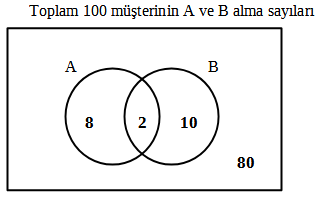

In [8]:
from PIL import Image
Image.open(r"C:\Users\akmet\Desktop\lift.png")

yukarıdaki şemaya bakacak olursak tüm müşteriler içinde A’yı alanların oranı %10 ve B’yi alanların oranı %12.  Müşterilerin %2’si  her iki  üründen de almıştır. A ürününü alanların 2 tanesi B ürününü de almış yani 10 kişiden 2 tanesi B’yi de almış. Oranlarsak A’nın özelinde B’nin alınma oranı %20 olur. Normal de %12 olan değer A kümesi özelinde %20’ye yükselmiş oldu. A ürünü B’nin değerini %12 den %20’ çıkararak bir kaldıraç görevi görmüş oldu. Sonuç olarak A ürününe odaklanırsak B’nin satılma oranını daha yükseltmiş oluruz.

Birbirine bağlanan ürünlerin etkilerini gösterir. Örnek lift(a->b) olsun. lift>1 ise a'nın alınması b ürünün alınmasına olumlu etki yaptığını gösterir. lift<1 ise a'nın alınması b'nin alınmasını olumsuz etkilediğini gösterir. lift = 1 ise bu iki ürün arasında herhangi bir kural ilişki yoktur. Yani a'nın alınmasının b'ye olumlu yada olumsuz herhangi bir etkisinin olmadığını gösterir.

<strong>Conviction (Kanaat,İnanç): </strong> Bu metrik eylemler bağımsız olsaydı birliktelik ne kadar yanlış olacağının oranını gösterir. 1'den büyükse yanlış tahmin yapmanın bu iki eylemin bağımsız olmasından daha az gerçekleştiğini gösterir. Çok kullanılan bir metric değildir.

<strong>Leverage : </strong> Ürünlerin birbirlerine ne kadar bağımlı olduklarını gösterir. Çok kullanılan bir metric değildir.

# MEDİUM SON

# ---------------------------------------------------------------------------------------------------------------

In [144]:
df,freq = encode(tree(data),data,0.5)
cols,keys = binary_ıtems(df,freq,0.5)
poli_ıtems(df,keys,cols,3,0.5)

olur: ('ekmek', 'bebek bezi', 'süt') : 0.5714285714285714  4
_____ekmek-('bebek bezi', 'süt')_____
confidence: 0.667
lift: 0.933
convic: 0.857142857142857
leverage: -0.04081632653061229
___________________________________
_____('bebek bezi', 'süt')-ekmek_____
confidence: 0.8
lift: 0.933
convic: 0.7142857142857146
leverage: -0.04081632653061229
___________________________________
_____bebek bezi-('ekmek', 'süt')_____
confidence: 0.667
lift: 0.933
convic: 0.857142857142857
leverage: -0.04081632653061229
___________________________________
_____('ekmek', 'süt')-bebek bezi_____
confidence: 0.8
lift: 0.933
convic: 0.7142857142857146
leverage: -0.04081632653061229
___________________________________
_____süt-('ekmek', 'bebek bezi')_____
confidence: 0.667
lift: 0.933
convic: 0.857142857142857
leverage: -0.04081632653061229
___________________________________
_____('ekmek', 'bebek bezi')-süt_____
confidence: 0.8
lift: 0.933
convic: 0.7142857142857146
leverage: -0.04081632653061229
____________

In [139]:
tıbbi = ["f,a,c,d,g,i,m,p","a,b,c,f,i,m,o","b,f,h,j,o","b,c,k,s,p"]
t_df = pd.DataFrame(tıbbi,index= ["100","200","300","400"],columns = ["Ürünler"])
sadi = ["1,3,4","2,3,5","1,2,3,5","2,5"]
sadi_df = pd.DataFrame(sadi,index= ["100","200","300","400"],columns = ["Ürünler"])
sadi_df

,Ürünler
100,"1,3,4"
200,"2,3,5"
300,"1,2,3,5"
400,"2,5"


In [140]:
df,freq = encode(tree(t_df),t_df,0.5)
cols,keys = binary_ıtems(df,freq,0.5)
poli_ıtems(df,keys,cols,3,0.5)

olur: ('f', 'a', 'c') : 0.5  2
_____f-('a', 'c')_____
confidence: 0.667
lift: 1.333
convic: 1.4999999999999998
leverage: 0.125
___________________________________
_____('a', 'c')-f_____
confidence: 1.0
lift: 1.333
convic: inf
leverage: 0.125
___________________________________
_____a-('f', 'c')_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
_____('f', 'c')-a_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
_____c-('f', 'a')_____
confidence: 0.667
lift: 1.333
convic: 1.4999999999999998
leverage: 0.125
___________________________________
_____('f', 'a')-c_____
confidence: 1.0
lift: 1.333
convic: inf
leverage: 0.125
___________________________________
olur: ('f', 'a', 'i') : 0.5  2
_____f-('a', 'i')_____
confidence: 0.667
lift: 1.333
convic: 1.4999999999999998
leverage: 0.125
___________________________________
_____('a', 'i')-f_____
confidence: 1.0
lift: 1.333
convic: inf
leverage: 0.125
_________

<ipython-input-136-58637ff42c8e>:120: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"convic: {(1-(b/l))/(1-(frq/a))}")


_____m-('f', 'c')_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
_____('f', 'c')-m_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
olur: ('f', 'i', 'm') : 0.5  2
_____f-('i', 'm')_____
confidence: 0.667
lift: 1.333
convic: 1.4999999999999998
leverage: 0.125
___________________________________
_____('i', 'm')-f_____
confidence: 1.0
lift: 1.333
convic: inf
leverage: 0.125
___________________________________
_____i-('f', 'm')_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
_____('f', 'm')-i_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
_____m-('f', 'i')_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
_____('f', 'i')-m_____
confidence: 1.0
lift: 2.0
convic: inf
leverage: 0.25
___________________________________
olur: ('f', 'b', 'o') : 0.5  2
_____f-('b', 'o')__

In [285]:
# sepet = pd.read_csv("https://bilkav.com/sepet.csv")

olur: ('mineral water', 'milk', 'spaghetti') : 0.017674418604651163  76
olur: ('mineral water', 'spaghetti', 'chocolate') : 0.017209302325581394  74


In [235]:
df[["süt","bebek bezi","kola"]].sum(axis=1)

0    2
1    1
2    1
3    3
4    3
5    2
6    3
dtype: int64

In [147]:
[True, False, True, False].count(True)

2

In [144]:
for i in keys:
    print(i)

('bira', 'kola')
('ekmek', 'kola')


In [113]:
aa = {('bira', 'ekmek'): 0.42857142857142855,
 ('bira', 'bebek bezi'): 0.5714285714285714,
 ('bira', 'süt'): 0.42857142857142855,
 ('ekmek', 'bebek bezi'): 0.7142857142857143}
l  = []
for i in keys:
    for k in range(len(i)):
        l.append(i[k] in ('süt', 'çerez', 'ekmek'))
    if False in l:
        print("error")
    else:print("olur: ",i)
    l = []

error
error
error
error


In [131]:
aa = df[list(('kola', 'salça'))]
fr = (aa.sum(axis=1).values == aa.ndim).sum()
print(fr)
aa

0


,kola,salça
0,0,0
1,0,1
2,0,0
3,1,0
4,1,0
5,0,1
6,1,0


In [613]:
cols = [i[0] for i in df.columns]
for i in cols:
    for x in cols[cols.index(i)+1:]:
        for k in cols[cols.index(x)+1:]:
            dim = df[[f"{i}",f"{x}",f"{k}"]]
            frq =(dim.sum(axis=1).values == dim.ndim).sum()
            s = frq/len(df)
            print(f"{i}-{x}-{k}: {s}")
    
    print("--------")

bira-ekmek-bebek bezi: 0.42857142857142855
bira-ekmek-süt: 0.7142857142857143
bira-ekmek-çerez: 0.42857142857142855
bira-ekmek-salça: 0.42857142857142855
bira-ekmek-yumurta: 0.2857142857142857
bira-ekmek-kola: 0.8571428571428571
bira-bebek bezi-süt: 0.42857142857142855
bira-bebek bezi-çerez: 0.42857142857142855
bira-bebek bezi-salça: 0.42857142857142855
bira-bebek bezi-yumurta: 0.42857142857142855
bira-bebek bezi-kola: 0.7142857142857143
bira-süt-çerez: 0.42857142857142855
bira-süt-salça: 0.42857142857142855
bira-süt-yumurta: 0.5714285714285714
bira-süt-kola: 0.5714285714285714
bira-çerez-salça: 0.42857142857142855
bira-çerez-yumurta: 0.2857142857142857
bira-çerez-kola: 0.2857142857142857
bira-salça-yumurta: 0.2857142857142857
bira-salça-kola: 0.2857142857142857
bira-yumurta-kola: 0.2857142857142857
--------
ekmek-bebek bezi-süt: 0.42857142857142855
ekmek-bebek bezi-çerez: 0.7142857142857143
ekmek-bebek bezi-salça: 0.7142857142857143
ekmek-bebek bezi-yumurta: 0.5714285714285714
ekmek-b

In [346]:
ask = support(df,freq)
# ask.drop(ask[ask["Support"]<0.28].index[0][0],axis=0,inplace = True)
ask

,Frequency,Support
bira,4.0,0.571429
ekmek,6.0,0.857143
bebek bezi,6.0,0.857143
süt,6.0,0.857143
çerez,2.0,0.285714
salça,2.0,0.285714
kola,3.0,0.428571


In [66]:
# tr = {}
# product = [data.loc[i].values[0].split(",") for i in range(len(data))]
# for i in range(len(product)):
#     for j in range(len(product[i])):
#         tr[product[i][j]] = 0

# product = [data.loc[i].values[0].split(",") for i in range(len(data))]
# for i in range(len(product)):
#     for j in range(len(product[i])):
#         tr[product[i][j]] = tr[product[i][j]]+1


In [67]:
def frequency(data):
    product = [data.loc[i].values[0].split(",") for i in range(len(data))]
    tr = {}
    for i in range(len(product)):
        for j in range(len(product[i])):
            if product[i][j] in tr.keys():
                tr[product[i][j]] = tr[product[i][j]]+1
            else:
                tr[product[i][j]] = 1
    return tr

In [5]:
def support(df,freq):
    support_df = pd.DataFrame(np.zeros(len(df)).reshape(len(df),1),columns = ["Support"],index = [i[0] for i in df.columns])
    for i in freq.index:
        support_df["Support"][i[0]] = freq.loc[i][0]/len(df) 
    support_df.drop(support_df[support_df["Support"]<0.28].index[0],axis=0,inplace = True)
    return support_df
def multi_d(support_df,n):
    cols = [i for i in support_df.index]
    for k in range(n):
        for i in list(combinations(cols, k+1)):
            dim = df[[f"{i}",f"{x}"]]
            frq =(dim.sum(axis=1).values == dim.ndim).sum()
            s = frq/len(df)